<a href="https://colab.research.google.com/github/raj3si/CodSoft/blob/main/CodSoft_Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [9]:
# Loading the dataset
titac=pd.read_csv("/content/Titanic-Dataset.csv")
titac.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df=titac.copy()

In [11]:
# Display the shape
df.shape

(891, 12)

In [12]:
# checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
mean=df['Age'].mean()
median=df['Age'].median()
mode=df['Age'].mode()[0]

In [14]:
# filling the age value with the mean,mode and median

# Simple fillna method
df['mean_age']=df["Age"].fillna(mean)
df['median_age']=df["Age"].fillna(median)
df["mode_age"]=df["Age"].fillna(mode)

In [15]:
df["imputed_age"]=df["Age"]

In [16]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mean_age,median_age,mode_age,imputed_age
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S,16.0,16.0,16.0,16.0
471,472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,38.0,38.0,38.0,38.0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S,25.0,25.0,25.0,25.0
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,25.0,25.0,25.0,25.0
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,38.0,38.0,38.0,38.0


In [17]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  mean_age     891 non-null    float64
 13  median_age   891 non-null    float64
 14  mode_age     891 non-null    float64
 15  imputed_age  714 non-null    float64
dtypes: float64(6), int64(5), object(5)
memory usage: 111.5+ KB


In [18]:
df["imputed_age"][df["imputed_age"].isnull()]=df['Age'].dropna().sample(df['Age'].isnull().sum()).values

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
mean_age         0
median_age       0
mode_age         0
imputed_age      0
dtype: int64

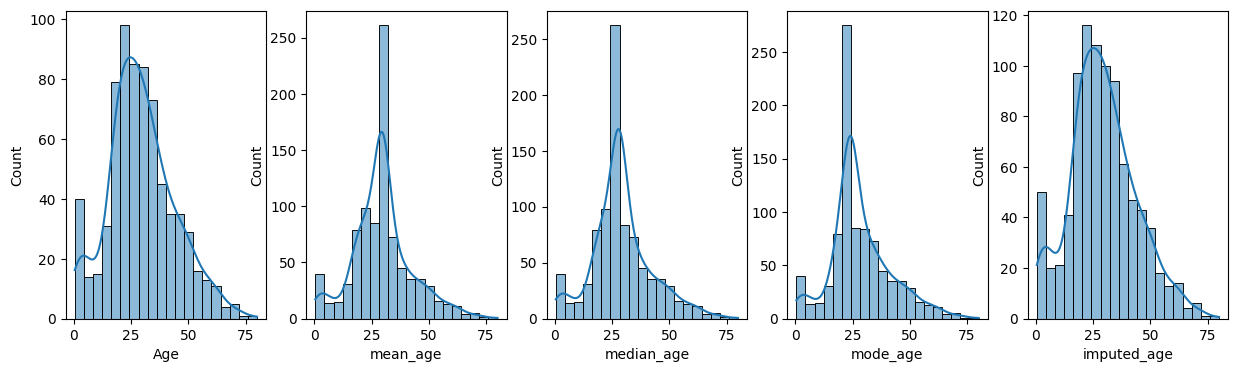

In [20]:
# Showing the distribution before filling the nan values
plt.figure(figsize=(15,4))
plt.subplot(1,5,1)
sns.histplot(df["Age"],bins=20,kde=True)

# Distribution of age through mean
plt.subplot(1,5,2)
sns.histplot(df["mean_age"],bins=20,kde=True)

# Distribution of age through median
plt.subplot(1,5,3)
sns.histplot(df["median_age"],bins=20,kde=True)

# Distribution of age through mode
plt.subplot(1,5,4)
sns.histplot(df["mode_age"],bins=20,kde=True)

plt.subplot(1,5,5)
sns.histplot(df['imputed_age'],bins=20,kde=True)
plt.show()

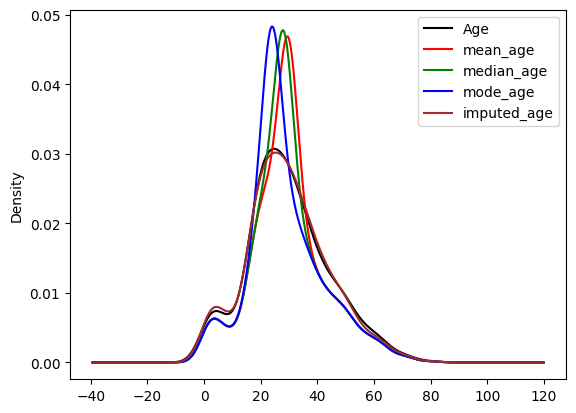

In [21]:
fig=plt.figure()
ax=fig.add_subplot(111)

# original
df['Age'].plot(kind='kde',ax=ax,color="black")

# mean imputed
df['mean_age'].plot(kind='kde',ax=ax,color="red")

# median imputed
df['median_age'].plot(kind='kde',ax=ax,color="green")

# mode imputed
df['mode_age'].plot(kind='kde',ax=ax,color="blue")

# random imputed
df['imputed_age'].plot(kind='kde',ax=ax,color="brown")

# add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")
plt.show()

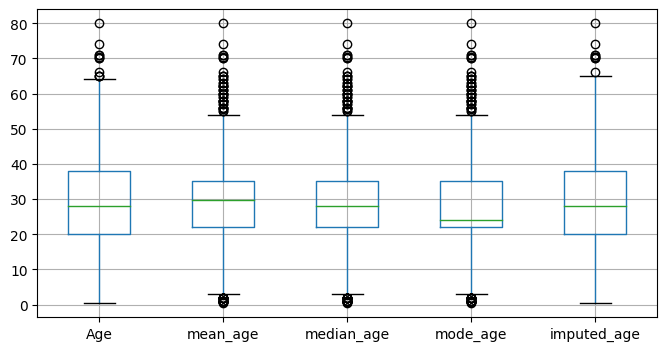

In [22]:
plt.figure(figsize=(8,4))
df[['Age','mean_age',"median_age","mode_age",'imputed_age']].boxplot()
plt.show()

In [23]:
# variance of the age,mean_age,median_age,mode_age
print("Variance of age:",df["Age"].var())
print("Variance of mean age:",df['mean_age'].var())
print("Variance of median age:",df['median_age'].var())
print("Variance of mode age:",df['mode_age'].var())
print("Variance of random age:",df['imputed_age'].var())

Variance of age: 211.01912474630802
Variance of mean age: 169.0523999372108
Variance of median age: 169.51249827942345
Variance of mode age: 174.22869485188968
Variance of random age: 207.60080277103117


In [24]:
# fill the embarked values
df['mode_embarked']=df['Embarked'].fillna(df["Embarked"].mode()[0])

In [25]:
# fill the cabin value
df["mode_cabin"]=df['Cabin'].fillna(df["Cabin"].mode()[0])

In [26]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'mean_age',
       'median_age', 'mode_age', 'imputed_age', 'mode_embarked', 'mode_cabin'],
      dtype='object')

In [27]:
# droping useless columns
df.drop(columns=["PassengerId","Name","Embarked","mode_cabin","Ticket","Cabin","Age","mean_age","median_age","mode_age"],axis=1,inplace=True)

In [28]:
df.groupby('Survived').mean()

,Pclass,SibSp,Parch,Fare,imputed_age
Survived,,,,,
0,2.531876,0.553734,0.329690,22.117887,30.143898
1,1.950292,0.473684,0.464912,48.395408,28.407895


In [29]:
df.groupby("Sex")[["Survived"]].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [30]:
df[['SibSp',"Survived"]].groupby(['SibSp'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [31]:
df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [32]:

df[["mode_embarked","Survived"]].groupby(['mode_embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,mode_embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


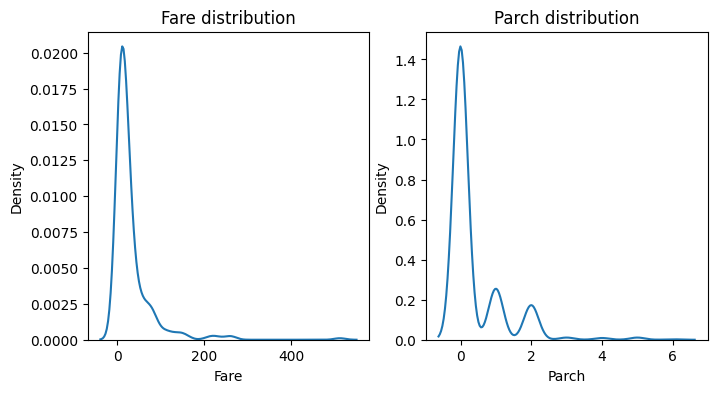

In [33]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.kdeplot(df['Fare'])
plt.title("Fare distribution")

plt.subplot(1,2,2)
sns.kdeplot(df["Parch"])
plt.title("Parch distribution")
plt.show()

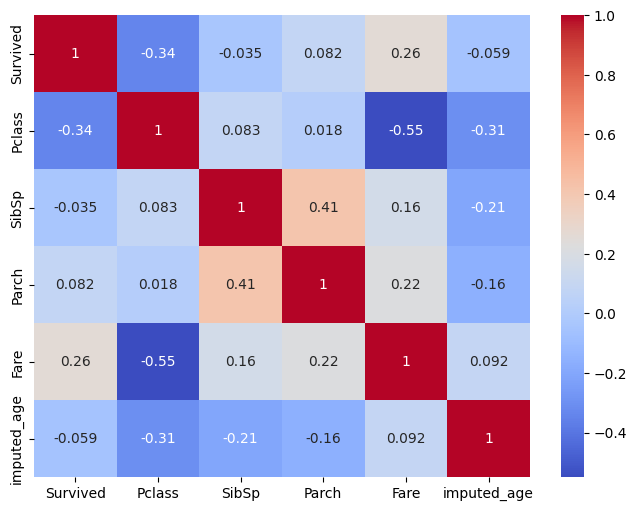

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [35]:
df.sample(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,imputed_age,mode_embarked
476,0,2,male,1,0,21.0000,34.0,S
879,1,1,female,0,1,83.1583,56.0,C
656,0,3,male,0,0,7.8958,43.0,S
341,1,1,female,3,2,263.0000,24.0,S
615,1,2,female,1,2,65.0000,24.0,S


In [36]:
x=df.iloc[:,1:]

In [37]:
x.sample(2)

,Pclass,Sex,SibSp,Parch,Fare,imputed_age,mode_embarked
715,3,male,0,0,7.65,19.0,S
543,2,male,1,0,26.00,32.0,S


In [38]:
y=df.iloc[:,:1]

In [39]:
y.sample(2)

,Survived
108,0
712,1


In [40]:
gen={"male":0,"female":1}
x["Sex"]=x['Sex'].apply(lambda x:gen[x])

In [41]:
embark={"C":0,"Q":1,"S":2}
x["mode_embarked"]=x["mode_embarked"].apply(lambda x:embark[x])

In [42]:
x

,Pclass,Sex,SibSp,Parch,Fare,imputed_age,mode_embarked
0,3,0,1,0,7.2500,22.0,2
1,1,1,1,0,71.2833,38.0,0
2,3,1,0,0,7.9250,26.0,2
3,1,1,1,0,53.1000,35.0,2
4,3,0,0,0,8.0500,35.0,2
...,...,...,...,...,...,...,...
886,2,0,0,0,13.0000,27.0,2
887,1,1,0,0,30.0000,19.0,2
888,3,1,1,2,23.4500,24.0,2
889,1,0,0,0,30.0000,26.0,0


In [43]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [44]:
# Training testing and spliting the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
# transformer=ColumnTransformer(transformer=[
#     ("tnf1",OrdinalEncoder(categories=[["male","female"]]),['Sex']),
#     ("tnf2",OrdinalEncoder(categories=[["C","Q","S"]]),["mode_embarked"])
# ],remainder="passthrough")

In [46]:
# Using logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.7932960893854749


In [48]:
# confusion metrics
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat=confusion_matrix(y_test,y_pred)
print(confusion_mat)
print(classification_report(y_test,y_pred))

[[88 17]
 [20 54]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



In [49]:
# using support vector
from sklearn.svm import SVC
model1=SVC()
model1.fit(x_train,y_train)

pred_y=model1.predict(x_test)
print("accuracy",accuracy_score(pred_y,y_test))

accuracy 0.6536312849162011


In [50]:
confusion_mat=confusion_matrix(y_test,pred_y)
print(confusion_mat)
print(classification_report(y_test,pred_y))

[[99  6]
 [56 18]]
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179



In [51]:
# Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()

model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pred2))

Accuracy: 0.6703910614525139


In [52]:
confusion_mat=confusion_matrix(y_test,y_pred2)
print(confusion_mat)
print(classification_report(y_test,y_pred2))

[[85 20]
 [39 35]]
              precision    recall  f1-score   support

           0       0.69      0.81      0.74       105
           1       0.64      0.47      0.54        74

    accuracy                           0.67       179
   macro avg       0.66      0.64      0.64       179
weighted avg       0.67      0.67      0.66       179



In [54]:
# using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3=GaussianNB()

model3.fit(x_train,y_train)

y_pred3=model3.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pred3))

Accuracy: 0.776536312849162


In [56]:
confusion_mat=confusion_matrix(y_test,y_pred3)
print(confusion_mat)
print(classification_report(y_test,y_pred3))

[[82 23]
 [17 57]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



In [59]:
# Using decision tree
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier(criterion='entropy',random_state=42)

model4.fit(x_train,y_train)

y_pred4=model4.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pred4))

Accuracy: 0.7821229050279329


In [60]:
confusion_mat=confusion_matrix(y_test,y_pred4)
print(confusion_mat)
print(classification_report(y_test,y_pred4))

[[87 18]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [61]:
result=pd.DataFrame({
    "Model":["Logistic Regression","Support Vector Machines","Naive Bayes","KNN","Desicion Tree"],
    "Score":[0.79,0.65,0.67,0.77,0.78]
})

In [63]:
result.sort_values(by='Score',ascending=False).set_index("Score")

,Model
Score,
0.79,Logistic Regression
0.78,Desicion Tree
0.77,KNN
0.67,Naive Bayes
0.65,Support Vector Machines
